In [8]:
import pandas as pd

In [212]:
df=pd.read_csv('_sm_oh.csv')

In [213]:
df.head()

,Unnamed: 0,Unnamed: 0.1,time_value,full_time_work_prop,stderr_full_time_work_prop,sample_size_full_time_work_prop,part_time_work_prop,stderr_part_time_work_prop,sample_size_part_time_work_prop,smoothed_search,...,deaths_7dav_incidence_num_smooth1,deaths_7dav_incidence_num_smooth2,date_smooth1,date_smooth2,days_smooth1,days_smooth2,fbf_mas_smooth1,fbf_mas_smooth2,fbf_men_smooth1,fbf_men_smooth2
0,74,74,2020-04-16,0.041828,0.000304,9213,0.055476,0.000372,9213.0,17.122565,...,25.034093,24.922236,1.586995e+18,1.586995e+18,0.0,0.0,22.542816,22.582367,21.240487,21.311931
1,75,75,2020-04-17,0.041459,0.000348,9212,0.055604,0.000404,9212.0,12.673587,...,26.835432,27.181411,1.587082e+18,1.587082e+18,1.0,1.0,22.520633,22.458225,21.415578,21.348271
2,76,76,2020-04-18,0.026292,0.000217,9210,0.037350,0.000275,9210.0,11.764859,...,29.138686,29.501771,1.587168e+18,1.587168e+18,2.0,2.0,22.328603,22.308745,21.379722,21.342846
3,77,77,2020-04-19,0.028494,0.000260,9212,0.038316,0.000309,9212.0,9.575618,...,31.992044,31.785402,1.587254e+18,1.587254e+18,3.0,3.0,22.127828,22.152867,21.292641,21.303790
4,78,78,2020-04-20,0.037371,0.000278,9220,0.051551,0.000340,9220.0,10.859135,...,34.543022,33.752580,1.587341e+18,1.587341e+18,4.0,4.0,21.967920,22.009444,21.214744,21.246272


In [214]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'time_value', 'full_time_work_prop',
       'stderr_full_time_work_prop', 'sample_size_full_time_work_prop',
       'part_time_work_prop', 'stderr_part_time_work_prop',
       'sample_size_part_time_work_prop', 'smoothed_search',
       'stderr_smoothed_search', 'sample_size_smoothed_search',
       'smoothed_adj_cli', 'stderr_smoothed_adj_cli',
       'sample_size_smoothed_adj_cli', 'smoothed_cli', 'stderr_smoothed_cli',
       'sample_size_smoothed_cli', 'smoothed_hh_cmnty_cli',
       'stderr_smoothed_hh_cmnty_cli', 'sample_size_smoothed_hh_cmnty_cli',
       'nmf_day_doc_fbc_fbs_ght', 'stderr_nmf_day_doc_fbc_fbs_ght',
       'sample_size_nmf_day_doc_fbc_fbs_ght', 'covid_ag_smoothed_pct_positive',
       'stderr_covid_ag_smoothed_pct_positive',
       'sample_size_covid_ag_smoothed_pct_positive', 'smoothed_adj_covid19',
       'stderr_smoothed_adj_covid19', 'sample_size_smoothed_adj_covid19',
       'confirmed_7dav_incidence_num', 'stderr_confirm

In [397]:
cases=df['confirmed_7dav_incidence_num'][7:].values

In [398]:
early=df['nmf_day_doc_fbc_fbs_ght'][:-7].values

In [399]:
pct_change=df['stderr_nmf_day_doc_fbc_fbs_ght'][:-7].values

In [400]:
d.set_index(pd.to_datetime(df['time_value'][:-7]), inplace=True)

In [401]:
d = pd.DataFrame()
d['cases']=cases
d['earlyInd']=early
d['pct_change']=pct_change

In [402]:
d.head()

,cases,earlyInd,pct_change
0,896.857143,1.002329,0.035750
1,863.857143,0.970479,0.040600
2,764.142857,0.958182,0.033116
3,624.714286,0.915411,0.033441
4,487.285714,0.910914,0.032691


In [375]:
forecast_col='cases'

In [376]:
d.isna().sum()

cases         0
earlyInd      0
pct_change    0
dtype: int64

In [228]:
from sklearn import preprocessing, model_selection, svm

In [229]:
from sklearn.linear_model import LinearRegression

In [232]:
import math

In [301]:
import datetime
from matplotlib import style
style.use('ggplot')

In [377]:
X=np.array(d)

In [378]:
forecast_col='cases'

In [380]:
forecast_out

8

In [379]:
forecast_out=int(math.ceil(0.05*len(d)))

In [381]:
d['label']=d[forecast_col].shift(-forecast_out)

In [382]:
d.head()

,cases,earlyInd,pct_change,label
time_value,,,,
2020-04-23,414.000000,0.907774,0.027001,863.857143
2020-04-24,461.285714,0.864820,0.026585,764.142857
2020-04-25,566.285714,0.880434,0.027390,624.714286
2020-04-26,709.428571,0.815560,0.027463,487.285714
2020-04-27,849.000000,0.797671,0.032658,434.857143


In [316]:
d.dropna(inplace=True)

In [383]:
d.tail()

,cases,earlyInd,pct_change,label
time_value,,,,
2020-09-08,1159.857143,0.616165,0.027559,NaN
2020-09-09,1169.142857,0.656686,0.024623,NaN
2020-09-10,1183.571429,0.639980,0.026508,NaN
2020-09-11,1188.571429,0.671039,0.027543,NaN
2020-09-12,1207.000000,0.684567,0.028035,NaN


In [384]:
X=np.array(d.drop(['label'],1))

In [385]:
y=np.array(d['label'])

In [386]:
X=preprocessing.scale(X)

In [387]:
X=X[:-forecast_out]
X_lately=X[-forecast_out:]

In [251]:
#X=X[:-forecast_out+1]

In [388]:
d.dropna(inplace=True)

In [389]:
y=np.array(d['label'])

In [390]:
print(len(X),len(y))

135 135


In [391]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [392]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7715205576982227


In [393]:
print(forecast_out)

8


In [394]:
forecast_set=clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[918.87943895 924.3012036  921.84624995 917.80458805 940.12624302
 937.50320369 966.08265565 983.252869  ] 0.7715205576982227 8


In [395]:
d['Forecast'] = np.nan

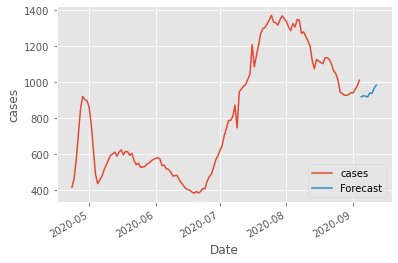

In [396]:
last_date = d.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    d.loc[next_date] = [np.nan for _ in range(len(d.columns)-1)] + [i]
    
d['cases'].plot()
d['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('cases')
plt.show()

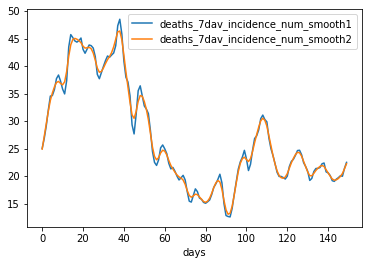

In [17]:
df.plot(x='days',y=['deaths_7dav_incidence_num_smooth1','deaths_7dav_incidence_num_smooth2'])

In [176]:
redcol=[col for col in df.columns if 'smooth2' in col]

In [177]:
redcol


['stderr_full_time_work_prop_smooth2',
 'sample_size_full_time_work_prop_smooth2',
 'part_time_work_prop_smooth2',
 'stderr_part_time_work_prop_smooth2',
 'sample_size_part_time_work_prop_smooth2',
 'smoothed_search_smooth2',
 'smoothed_adj_cli_smooth2',
 'smoothed_cli_smooth2',
 'stderr_smoothed_cli_smooth2',
 'sample_size_smoothed_cli_smooth2',
 'smoothed_hh_cmnty_cli_smooth2',
 'stderr_smoothed_hh_cmnty_cli_smooth2',
 'sample_size_smoothed_hh_cmnty_cli_smooth2',
 'nmf_day_doc_fbc_fbs_ght_smooth2',
 'stderr_nmf_day_doc_fbc_fbs_ght_smooth2',
 'smoothed_adj_covid19_smooth2',
 'confirmed_7dav_incidence_num_smooth2',
 'deaths_7dav_incidence_num_smooth2',
 'date_smooth2',
 'days_smooth2',
 'fbf_mas_smooth2',
 'fbf_men_smooth2']

In [79]:
redcol.remove('days_smooth2')

In [80]:
len(redcol)

9

In [178]:
redf=df[redcol]

In [179]:
redf.isna().sum()

stderr_full_time_work_prop_smooth2           0
sample_size_full_time_work_prop_smooth2      0
part_time_work_prop_smooth2                  0
stderr_part_time_work_prop_smooth2           0
sample_size_part_time_work_prop_smooth2      0
smoothed_search_smooth2                      0
smoothed_adj_cli_smooth2                     0
smoothed_cli_smooth2                         0
stderr_smoothed_cli_smooth2                  0
sample_size_smoothed_cli_smooth2             0
smoothed_hh_cmnty_cli_smooth2                0
stderr_smoothed_hh_cmnty_cli_smooth2         0
sample_size_smoothed_hh_cmnty_cli_smooth2    0
nmf_day_doc_fbc_fbs_ght_smooth2              0
stderr_nmf_day_doc_fbc_fbs_ght_smooth2       0
smoothed_adj_covid19_smooth2                 0
confirmed_7dav_incidence_num_smooth2         0
deaths_7dav_incidence_num_smooth2            0
date_smooth2                                 0
days_smooth2                                 0
fbf_mas_smooth2                              0
fbf_men_smoot

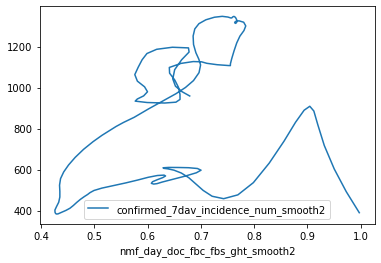

In [191]:
redf.plot(x='nmf_day_doc_fbc_fbs_ght_smooth2',y='confirmed_7dav_incidence_num_smooth2')

In [210]:
df=pd.DataFrame()
df['earlyINd']=redf['nmf_day_doc_fbc_fbs_ght_smooth2']
df['cases']=redf['confirmed_7dav_incidence_num_smooth2']
df['deaths*27']=redf['deaths_7dav_incidence_num_smooth2']*27

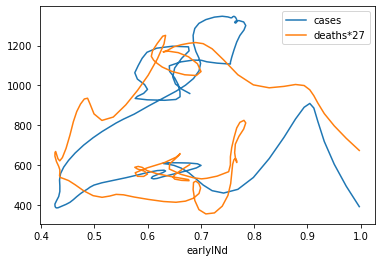

In [211]:
df.plot(x='earlyINd',y=['cases','deaths*27'])

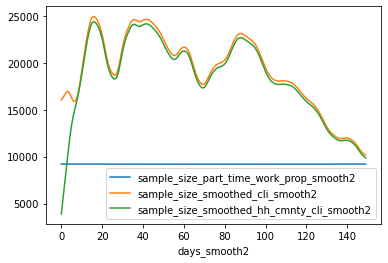

In [190]:
redf.plot(x='days_smooth2',y=['sample_size_part_time_work_prop_smooth2','sample_size_smoothed_cli_smooth2','sample_size_smoothed_hh_cmnty_cli_smooth2'])

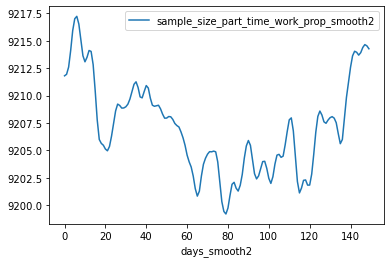

In [187]:
redf.plot(x='days_smooth2',y='sample_size_part_time_work_prop_smooth2')

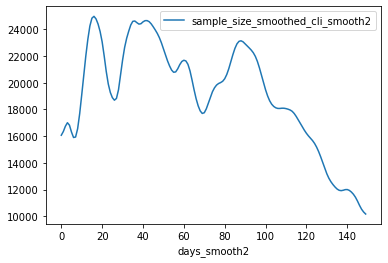

In [188]:
redf.plot(x='days_smooth2',y='sample_size_smoothed_cli_smooth2')

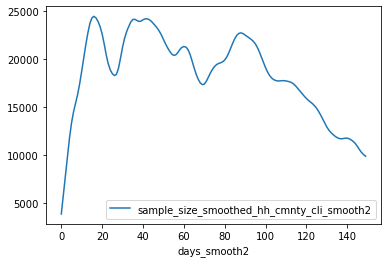

In [189]:
redf.plot(x='days_smooth2',y='sample_size_smoothed_hh_cmnty_cli_smooth2')

In [ ]:
df=pd.DataFrame()
df['partHigh']=(redf['part_time_work_prop_smooth2']+redf['stderr_part_time_work_prop_smooth2'])/redf['sample_size_part_time_work_prop_smooth2']
df['partLow']=(redf['part_time_work_prop_smooth2']-redf['stderr_part_time_work_prop_smooth2'])/redf['sample_size_part_time_work_prop_smooth2']

df['earlyIndHigh'] = (redf['nmf_day_doc_fbc_fbs_ght_smooth2']+redf['stderr_nmf_day_doc_fbc_fbs_ght_smooth2'])
df['earlyIndLow'] = (redf['nmf_day_doc_fbc_fbs_ght_smooth2']+redf['stderr_nmf_day_doc_fbc_fbs_ght_smooth2'])

df['hospAdmission'] = redf['smoothed_adj_covid19_smooth2']

df['cases']=redf['confirmed_7dav_incidence_num_smooth2']
df['deaths']=redf['deaths_7dav_incidence_num_smooth2']

In [183]:
df=pd.DataFrame()
df['partHigh']=(redf['part_time_work_prop_smooth2']+redf['stderr_part_time_work_prop_smooth2'])/redf['sample_size_part_time_work_prop_smooth2']
df['partLow']=(redf['part_time_work_prop_smooth2']-redf['stderr_part_time_work_prop_smooth2'])/redf['sample_size_part_time_work_prop_smooth2']

df['earlyIndHigh'] = (redf['nmf_day_doc_fbc_fbs_ght_smooth2']+redf['stderr_nmf_day_doc_fbc_fbs_ght_smooth2'])
df['earlyIndLow'] = (redf['nmf_day_doc_fbc_fbs_ght_smooth2']+redf['stderr_nmf_day_doc_fbc_fbs_ght_smooth2'])

df['hospAdmission'] = redf['smoothed_adj_covid19_smooth2']

df['cases']=redf['confirmed_7dav_incidence_num_smooth2']
df['deaths']=redf['deaths_7dav_incidence_num_smooth2']

In [184]:
df.to_csv('OH_test2.csv')

In [181]:
df=pd.DataFrame()
df['partHigh']=(redf['part_time_work_prop_smooth2']+redf['stderr_part_time_work_prop_smooth2'])/redf['sample_size_part_time_work_prop_smooth2']
df['partLow']=(redf['part_time_work_prop_smooth2']-redf['stderr_part_time_work_prop_smooth2'])/redf['sample_size_part_time_work_prop_smooth2']

df['search'] = redf['smoothed_search_smooth2']

df['doctorVisits'] = redf['smoothed_adj_cli_smooth2']

df['symptomsHigh'] = (redf['smoothed_cli_smooth2']+redf['stderr_smoothed_cli_smooth2'])/redf['sample_size_smoothed_cli_smooth2']
df['symptomsLow'] = (redf['smoothed_cli_smooth2']-redf['stderr_smoothed_cli_smooth2'])/redf['sample_size_smoothed_cli_smooth2']

df['symptomsInCmtyHigh'] = (redf['smoothed_hh_cmnty_cli_smooth2']+redf['stderr_smoothed_hh_cmnty_cli_smooth2'])/redf['sample_size_smoothed_hh_cmnty_cli_smooth2']
df['symptomsInCmtyLow'] = (redf['smoothed_hh_cmnty_cli_smooth2']+redf['stderr_smoothed_hh_cmnty_cli_smooth2'])/redf['sample_size_smoothed_hh_cmnty_cli_smooth2']

df['hospAdmission'] = redf['smoothed_adj_covid19_smooth2']

df['cases']=redf['confirmed_7dav_incidence_num_smooth2']
df['deaths']=redf['deaths_7dav_incidence_num_smooth2']

In [182]:
df.to_csv('OH_test1.csv')

In [82]:
redf.head()

,part_time_work_prop_smooth2,smoothed_search_smooth2,smoothed_adj_cli_smooth2,smoothed_cli_smooth2,smoothed_hh_cmnty_cli_smooth2,nmf_day_doc_fbc_fbs_ght_smooth2,smoothed_adj_covid19_smooth2,confirmed_7dav_incidence_num_smooth2,deaths_7dav_incidence_num_smooth2
0,0.053997,15.701678,0.795110,0.716002,21.947149,0.997343,5.702840,390.395582,24.922236
1,0.049367,13.460489,0.783001,0.718848,21.903248,0.972855,5.733842,493.057178,27.181411
2,0.045816,11.772045,0.770781,0.717288,21.825795,0.950334,5.780925,603.565563,29.501771
3,0.045602,10.963746,0.759719,0.708979,21.728328,0.931629,5.861810,718.027117,31.785402
4,0.048486,11.205584,0.759651,0.693757,21.627858,0.919504,5.971064,819.013266,33.752580


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redf)

StandardScaler()

In [84]:
scaled_data = scaler.transform(redf)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [86]:
x_pca = pca.transform(scaled_data)

In [87]:
scaled_data.shape

(150, 9)

In [92]:
scdf=pd.DataFrame(scaled_data)
#scaled_data.to_csv('scaled_data.csv')

In [93]:
scdf.to_csv('scaled_data.csv')

In [88]:
x_pca.shape

(150, 2)

In [94]:
x_pcadf=pd.DataFrame(x_pca)

In [96]:
x_pcadf.to_csv('xpca_data.csv')

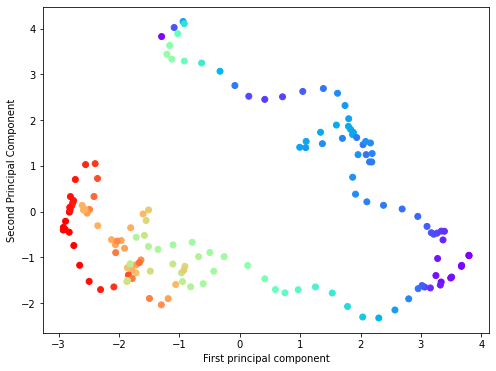

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=redf['confirmed_7dav_incidence_num_smooth2'].values,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.savefig('pcaOH2PCAconfirmed_7dav_incidence_num_smooth2_notdays.png')

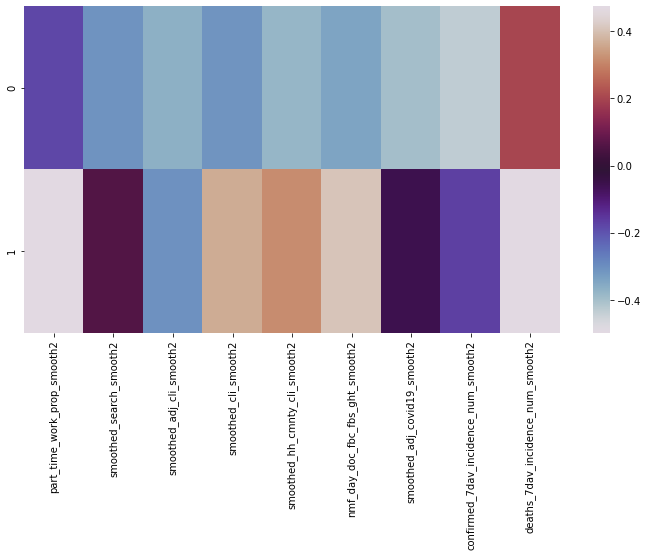

In [90]:
map= pd.DataFrame(pca.components_, columns=redf.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')
plt.savefig('mapOH2PCAnotdays.png', bbox_inches='tight')

In [73]:
redf.to_csv('reduced_oh.csv')

In [114]:
X=np.zeros((140,2))

In [115]:
len(X)

140

In [116]:
for i in range(len(X)):
    X[i]=i,i

In [167]:
d=np.array([[0],[0]])

In [168]:
d

array([[0],
       [0]])

In [166]:
X[0]

array([0., 0.])

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
a=np.stack((vector[0][:-10],vector[1][:-10]),axis=1)

In [174]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [132]:
vector

(array([ 390.39558237,  493.05717818,  603.5655627 ,  718.02711721,
         819.0132656 ,  886.11776768,  909.32840746,  890.11573212,
         831.18671837,  739.08664514,  631.96645714,  536.95160631,
         477.33766131,  458.67760095,  470.57686355,  498.92278027,
         531.72151038,  561.49016757,  584.01022343,  597.74838601,
         604.23303546,  606.80216809,  609.43277127,  611.12100227,
         610.8162858 ,  609.76262348,  605.88726815,  597.63504064,
         585.02599488,  568.26208295,  552.06558632,  539.92430288,
         532.08989665,  529.99802287,  533.56420018,  541.42309703,
         551.31402022,  561.42531469,  569.5603106 ,  573.61387765,
         571.70575243,  562.98576321,  549.55314079,  535.68656878,
         522.44846278,  510.30700215,  498.76595857,  488.20566483,
         479.08772404,  469.02951081,  455.800415  ,  440.58775227,
         425.46932333,  412.22348777,  401.81411809,  393.87608936,
         387.95762008,  384.54639128,  383.99977

In [153]:
len(a)

150

In [149]:
predict= [[141], [141]]
np.array(predict).ndim

2

In [151]:
from sklearn import linear_model

In [161]:
vector = redf['confirmed_7dav_incidence_num_smooth2'].values[:-10],redf['deaths_7dav_incidence_num_smooth2'].values[:-10]

In [162]:
vector

(array([ 390.39558237,  493.05717818,  603.5655627 ,  718.02711721,
         819.0132656 ,  886.11776768,  909.32840746,  890.11573212,
         831.18671837,  739.08664514,  631.96645714,  536.95160631,
         477.33766131,  458.67760095,  470.57686355,  498.92278027,
         531.72151038,  561.49016757,  584.01022343,  597.74838601,
         604.23303546,  606.80216809,  609.43277127,  611.12100227,
         610.8162858 ,  609.76262348,  605.88726815,  597.63504064,
         585.02599488,  568.26208295,  552.06558632,  539.92430288,
         532.08989665,  529.99802287,  533.56420018,  541.42309703,
         551.31402022,  561.42531469,  569.5603106 ,  573.61387765,
         571.70575243,  562.98576321,  549.55314079,  535.68656878,
         522.44846278,  510.30700215,  498.76595857,  488.20566483,
         479.08772404,  469.02951081,  455.800415  ,  440.58775227,
         425.46932333,  412.22348777,  401.81411809,  393.87608936,
         387.95762008,  384.54639128,  383.99977

In [163]:
a=np.stack((vector[0],vector[1]),axis=1)

In [164]:
a

array([[ 390.39558237,   24.92223605],
       [ 493.05717818,   27.18141074],
       [ 603.5655627 ,   29.50177126],
       [ 718.02711721,   31.78540241],
       [ 819.0132656 ,   33.75257996],
       [ 886.11776768,   35.1157049 ],
       [ 909.32840746,   36.21595386],
       [ 890.11573212,   37.0167537 ],
       [ 831.18671837,   37.20628724],
       [ 739.08664514,   36.8561578 ],
       [ 631.96645714,   36.59014804],
       [ 536.95160631,   37.13869914],
       [ 477.33766131,   39.02318959],
       [ 458.67760095,   41.78360054],
       [ 470.57686355,   43.85679673],
       [ 498.92278027,   44.81126824],
       [ 531.72151038,   45.02005217],
       [ 561.49016757,   44.87808919],
       [ 584.01022343,   44.61310605],
       [ 597.74838601,   44.23835391],
       [ 604.23303546,   43.60400163],
       [ 606.80216809,   43.2623235 ],
       [ 609.43277127,   43.31236129],
       [ 611.12100227,   43.40663028],
       [ 610.8162858 ,   43.1422499 ],
       [ 609.76262348,   

In [165]:
#X is the independent variable (bivariate in this case)

#vector is the dependent data

vector=a
#predict is an independent variable for which we'd like to predict the value
predict= [[141], [141]]

#generate a model of polynomial features
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(predict)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
#X_ = np.delete(X_,(1),axis=1)
#predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = linear_model.LinearRegression()
#preform the actual regression
clf.fit(X_, vector)

print("X_ = ",X_)
print("predict_ = ",predict_)
print("Prediction = ",clf.predict(predict_))

X_ =  [[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 2.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00]
 [1.0000e+00 3.0000e+00 3.0000e+00 9.0000e+00 9.0000e+00 9.0000e+00]
 [1.0000e+00 4.0000e+00 4.0000e+00 1.6000e+01 1.6000e+01 1.6000e+01]
 [1.0000e+00 5.0000e+00 5.0000e+00 2.5000e+01 2.5000e+01 2.5000e+01]
 [1.0000e+00 6.0000e+00 6.0000e+00 3.6000e+01 3.6000e+01 3.6000e+01]
 [1.0000e+00 7.0000e+00 7.0000e+00 4.9000e+01 4.9000e+01 4.9000e+01]
 [1.0000e+00 8.0000e+00 8.0000e+00 6.4000e+01 6.4000e+01 6.4000e+01]
 [1.0000e+00 9.0000e+00 9.0000e+00 8.1000e+01 8.1000e+01 8.1000e+01]
 [1.0000e+00 1.0000e+01 1.0000e+01 1.0000e+02 1.0000e+02 1.0000e+02]
 [1.0000e+00 1.1000e+01 1.1000e+01 1.2100e+02 1.2100e+02 1.2100e+02]
 [1.0000e+00 1.2000e+01 1.2000e+01 1.4400e+02 1.4400e+02 1.4400e+02]
 [1.0000e+00 1.3000e+01 1.3000e+01 1.6900e+02 1.6900e+02 1.6900e+02]
 [1.0000e+00 1.4000e+01 1.40

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 3)

In [121]:
X_

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00,
        4.0000e+00],
       [1.0000e+00, 3.0000e+00, 3.0000e+00, 9.0000e+00, 9.0000e+00,
        9.0000e+00],
       [1.0000e+00, 4.0000e+00, 4.0000e+00, 1.6000e+01, 1.6000e+01,
        1.6000e+01],
       [1.0000e+00, 5.0000e+00, 5.0000e+00, 2.5000e+01, 2.5000e+01,
        2.5000e+01],
       [1.0000e+00, 6.0000e+00, 6.0000e+00, 3.6000e+01, 3.6000e+01,
        3.6000e+01],
       [1.0000e+00, 7.0000e+00, 7.0000e+00, 4.9000e+01, 4.9000e+01,
        4.9000e+01],
       [1.0000e+00, 8.0000e+00, 8.0000e+00, 6.4000e+01, 6.4000e+01,
        6.4000e+01],
       [1.0000e+00, 9.0000e+00, 9.0000e+00, 8.1000e+01, 8.1000e+01,
        8.1000e+01],
       [1.0000e+00, 1.0000e+01, 1.0000e+01, 1.0000e+02, 1.0000e+02,
        1.0000e+02],
       [1.0000e+00, 1

In [98]:
X

array([[0.28799232],
       [0.36116241],
       [0.43108326],
       [0.60342209],
       [0.70215566],
       [0.78809954],
       [0.79747327],
       [0.95281267],
       [1.02049549],
       [1.03210265],
       [1.32048237],
       [1.41243036],
       [1.43034951],
       [1.45716946],
       [1.56186148],
       [1.76823679],
       [2.03219059],
       [2.34541098],
       [2.5477566 ],
       [2.572695  ],
       [2.67629046],
       [2.87423529],
       [2.91756384],
       [3.13614461],
       [3.139033  ],
       [3.30764958],
       [3.99727874],
       [4.06508717],
       [4.09914539],
       [4.24408565],
       [4.26726939],
       [4.4372032 ],
       [4.48297597],
       [4.55741666],
       [4.59460688],
       [4.63596473],
       [4.79860853],
       [4.81930345],
       [4.87212796],
       [4.93761004]])